In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/lithium_2019.csv'
df = pd.read_csv(file_path)

columns_to_keep = ['GKGRECORDID', 'DATE', 'DocumentIdentifier', 'Themes', 'V2Themes',
                   'Locations', 'V2Locations', 'Organizations', 'V2Organizations', 'V2Tone', 'FinalThemes']

filtered_df = df[columns_to_keep]
filtered_df = filtered_df[filtered_df['DocumentIdentifier'].str.contains("lithium", case=False, na=False)]
filtered_df.head()

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,FinalThemes
26,20190218201500-563,2019/2/18 20:15,https://www.prnewswire.com:443/news-releases/c...,EPU_ECONOMY_HISTORIC;UNGP_FORESTS_RIVERS_OCEAN...,"GENERAL_GOVERNMENT,3172;EPU_POLICY_GOVERNMENT,...",1#China#CH#CH#35#105#CH;1#Japan#JA#JA#36#138#J...,"4#Dublin, Dublin, Ireland#EI#EI07#18288#53.333...",['schlumberger nv'],"Custom Research,7231;Office Hours Call,7394;Of...",-0.387296669,"TAX_ETHNICITY,GENERAL_GOVERNMENT,NEGOTIATIONS"
207,20190911080000-1081,2019/9/11 8:00,https://finance.yahoo.com/news/tianqi-starts-l...,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;DELAY;U...,"ECON_SUBSIDIES,1125;WB_1948_SUBSIDIES,1125;WB_...",1#Australia#AS#AS#-25#135#AS;1#United States#U...,"4#Beijing, Beijing, China#CH#CH22#13001#39.928...",['albemarle corp'],"Reuters,31;United States,1600",-1.538461538,"TAX_ETHNICITY,DELAY,ECON_SUBSIDIES"
432,20190227141500-31,2019/2/27 14:15,http://globenewswire.com/news-release/2019/02/...,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_DRILL;MANMAD...,"TAX_FNCACT_EXECUTIVE_OFFICER,5410;TAX_FNCACT_E...","2#New York, United States#US#USNY#42.1497#-74....","2#New York, United States#US#USNY##42.1497#-74...",['cabot oil & gas corp'],"National Instrument,4280;National Instrument,4...",0.106496273,"MANMADE_DISASTER_IMPLIED,ENV_MINING,SLFID_MINE..."
522,20191003084500-1368,2019/10/3 8:45,https://www.wkrb13.com/2019/10/03/prudential-p...,EPU_CATS_REGULATION;EPU_CATS_FINANCIAL_REGULAT...,"ECON_STOCKMARKET,268;ECON_STOCKMARKET,1099;ECO...",NaN,NaN,['prudential financial inc'],"Steward Partners Investment Advisory,1230;Exch...",1.863354037,"ECON_STOCKMARKET,CORRUPTION"
567,20191007214500-1189,2019/10/7 21:45,https://991thewhale.com/endicott-awaits-start-...,LEADER;TAX_FNCACT;TAX_FNCACT_GOVERNOR;TAX_FNCA...,"ECON_BANKRUPTCY,1096;WB_368_LEASING,981;TAX_FN...","2#New York, United States#US#USNY#42.1497#-74....","2#New York, United States#US#USNY##42.1497#-74...",['ibm'],"Ibm,258;Huron Real Estate Associates,872",-0.480769231,"ECON_HOUSING_PRICES,ECON_BANKRUPTCY"


## **Lithium related news stats 2019**
(5) # of days with news

(6) average # of news items per news day

(7) average tone for news days.

(8) average standard deviation of the tone across news items.

In [ ]:
filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'], errors='coerce')
filtered_df['V2Tone'] = pd.to_numeric(filtered_df['V2Tone'], errors='coerce')
filtered_df_cleaned = filtered_df.dropna(subset=['DATE', 'V2Tone'])
grouped_by_date_cleaned = filtered_df_cleaned.groupby(filtered_df_cleaned['DATE'].dt.date)

# Calculate number of days with news
number_of_days_with_news_cleaned = grouped_by_date_cleaned.size().size

# Calculate average number of news items per news day
average_news_items_per_day_cleaned = grouped_by_date_cleaned.size().mean()

# Calculate average tone for news days
average_tone_per_day_cleaned = grouped_by_date_cleaned['V2Tone'].mean().mean()

# Calculate average standard deviation of the tone across news items
average_std_dev_tone_per_day_cleaned = grouped_by_date_cleaned['V2Tone'].std().mean()

print("Number of days with news:", number_of_days_with_news_cleaned)
print("Average number of news items per news day:", average_news_items_per_day_cleaned)
print("Average tone for news days:", average_tone_per_day_cleaned)
print("Average standard deviation of the tone across news items:", average_std_dev_tone_per_day_cleaned)

Number of days with news: 39
Average number of news items per news day: 1.9743589743589745
Average tone for news days: 0.07424783758782051
Average standard deviation of the tone across news items: 0.3266516841111776


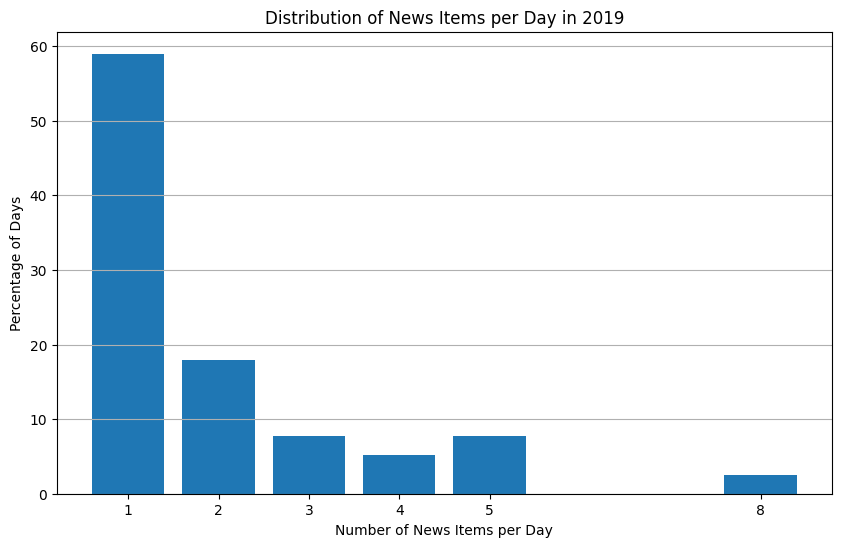

mean 1.9743589743589745
std 1.597484527347514


In [ ]:
import matplotlib.pyplot as plt

news_items_per_day = grouped_by_date_cleaned.size()

# Calculate histogram data
hist_data = news_items_per_day.value_counts(normalize=True).sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(hist_data.index, hist_data.values * 100)
plt.xlabel('Number of News Items per Day')
plt.ylabel('Percentage of Days')
plt.title('Distribution of News Items per Day in 2019')
plt.xticks(hist_data.index)
plt.grid(axis='y')
plt.show()

# Calculate mean and standard deviation of the number of news items per day
mean_news_items_per_day = news_items_per_day.mean()
std_dev_news_items_per_day = news_items_per_day.std()

print("mean",mean_news_items_per_day)
print("std",std_dev_news_items_per_day)


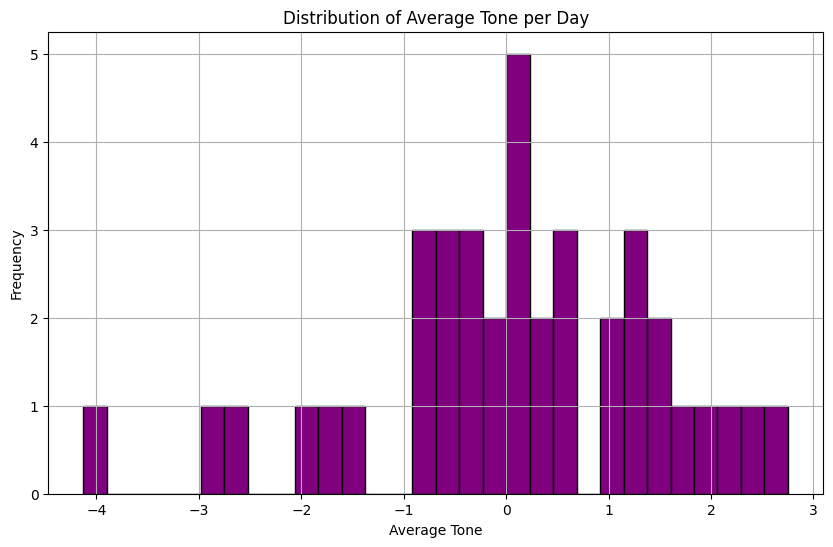

Mean of average tone per day: 0.07424783758782051
Standard deviation of average tone per day: 1.4707794420325992


In [ ]:
mean_tone_per_day = grouped_by_date_cleaned['V2Tone'].mean()
std_dev_tone_per_day = grouped_by_date_cleaned['V2Tone'].std()

# Plot histogram of average tone per day
plt.figure(figsize=(10, 6))
plt.hist(mean_tone_per_day, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Average Tone per Day')
plt.xlabel('Average Tone')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Report mean and standard deviation of the average tone
average_tone_mean = mean_tone_per_day.mean()
average_tone_std_dev = mean_tone_per_day.std()

print("Mean of average tone per day:", average_tone_mean)
print("Standard deviation of average tone per day:", average_tone_std_dev)